# question 1
## a) proof 
$$var[X] = E[(X- E[X])^2]$$\
$$var[Y] = E[(Y- E[Y])^2]$$\
$$cov[X,Y] = E((X-E[X])(Y-E[Y]))$$\
$$
\begin{equation}
\begin{split}
var[X+Y]&=E[(X+Y- E[X+Y])^2]\\
&=E[(X+Y- E[X]-E[Y])^2]\\
&=E[(X-E[X]+Y-E[Y])^2]\\
&=E[(X-E[X])^2+(Y-E[Y])^2+2(X-E[X])(Y-E[Y])]\\
&=E[(X-E[X])^2]+E[(Y-E[Y])^2]+2E[(X-E[X])(Y-E[Y])]\\
&=var[X]+var[Y]+2cov[X,Y]
\end{split}
\end{equation}$$

## b)

In [86]:
import numpy as np
mean = [0,0]
cov = [[1,3],[3,10]]
x,y= np.random.multivariate_normal(mean,cov,100).T
x_mean = np.mean(x)
print("x's mean is", x_mean)
y_mean = np.mean(y)
print("y's mean is", y_mean)
x_var = np.var(x)
print("x's variance is", x_var)
y_var = np.var(y)
print("y's variance is", y_var)
xy_cov = list(np.cov(x,y))
print("x,y's covariance is",xy_cov)

x's mean is 0.14098805478962687
y's mean is 0.3777102705654734
x's variance is 0.9477808072935915
y's variance is 10.32152931744173
x,y's covariance is [array([0.95735435, 2.99696691]), array([ 2.99696691, 10.42578719])]


According to the result, we can see that the empirical variance and covariances is close to the initial values, so the formula is correct.

# Question 2
## a)
The likelihood is $p(x|\theta) = \theta e^{-\theta x}$\
Therefore,after n trials
$$ p(data|\theta) = p(x_{1},x_{2},x_{3},...,x_{n}|\theta) = \theta^{n}e^{\theta\sum_{i=1}^{n}x_{n}}$$
Maximizing likelihood is the same as maximizing log likelihood.
$$log\ likelihood = ln(p(data|\theta)) = nln\theta - \theta \sum x_{n}$$
$$\frac{d}{dp}(log\ likelihood) = \frac{n}{\theta} - \sum x_{n} = 0$$
$$\Rightarrow \hat{\theta} = \frac{n}{\sum x_{n}}$$
$$\Rightarrow \hat{\theta} = \frac{1}{\bar{x}}$$
## b）
we have $x_{1} = 5$,$x_{2} = 6$,$x_{3} = 4$
therefore, the maximum likelihood of this data is 
$$
\begin{equation}
\begin{split}
\hat{\theta} &= \frac{1}{\bar{x}}\\
&= \frac{1}{5}
\end{split}
\end{equation}
$$
## c)
$\because prior = \theta^{3}e^{-3\theta}$ and $likelihood = p(data|\theta) = \theta^{n}e^{\theta\sum_{i=1}^{n}x_{n}}$\
$$
\begin{equation}
\begin{split}
posterior &= \frac{p(\theta)*p(x|\theta)}{p(x)}\\
    &=\frac{\theta^{3}e^{-3\theta} * \theta^{n}e^{\theta\sum_{i=1}^{n}x_{n}}}{\int \theta^{3}e^{-3\theta} * \theta^{n}e^{\theta\sum_{i=1}^{n}x_{n}}}d\theta\\
    &=c\theta^{3}e^{-3\theta} * \theta^{n}e^{\theta\sum_{i=1}^{n}x_{n}} \\
    &=c\theta^{3+n}e^{-(3+\theta\sum_{i=1}^{n}x_{n})}
\end{split}
\end{equation}
$$
## d)
$\because$ from c) we can see that posterior result from exponential prior and likelihood is also in the exponential family.\
$\therefore$ the exponential prior conjugate to the exponential likelihood.

# Question 3
I devide the dataset half into the training set and half into the test set.\
In total we have ten data in each variable, therefore I chose 5 as training data and another 5 as test data.\
I can used the model trained to predict the test data, and calculate the r-squared and adjusted r-squared.\
In both linear regression and ridge regression test error is larger than training error.\
Compared with linear regression method, ridge regression has lower test error, because ridge regression used 
regularization to solve over fitting problem.

In [106]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([10.9, 12.4, 13.5, 14.6, 14.8, 15.6, 16.2, 17.5, 18.3, 18.6])
y = np.array([24.8, 30.0, 31.0, 29.3, 35.9, 36.9, 42.5, 37.9, 38.9, 40.5])
x_train = x[:5].reshape(-1,1)
y_train = y[:5]
x_test = x[5:].reshape(-1,1)
y_test = y[5:]
n = 5
p = 1

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
y_pred_train = regr.predict(x_train)
R2 =abs(r2_score(y_test,y_pred))
R2_train =abs(r2_score(y_train,y_pred_train))
Adjust_R2 = 1-(1-R2)*(n-1)/(n-p-1)
Adjust_R2_train = 1-(1-R2_train)*(n-1)/(n-p-1)
print("Linear regression", "R2 is", R2, "Adjused R2 is", Adjust_R2)
print("Linear regression", "R2_train is", R2_train, "Adjused R2 train is", Adjust_R2_train)

n_alphas = 10
alpha = np.logspace(-10, -2, n_alphas)
ridge = linear_model.Ridge(alpha=0.5, fit_intercept=False)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)
y_pred_ridge_train = ridge.predict(x_train)
R2_ridge = abs(r2_score(y_test,y_pred_ridge))
R2_ridge_train = abs(r2_score(y_train,y_pred_ridge_train))
Adjust_R2_ridge = 1-(1-R2)*(n-1)/(n-p-1)
Adjust_R2_ridge_train = 1-(1-R2_train)*(n-1)/(n-p-1)
print("Ridge regression", "R2 is", R2_ridge, "Adjused R2 is", Adjust_R2_ridge)
print("Ridge regression", "R2_train is", R2_ridge_train, "Adjused R2 train is", Adjust_R2_ridge_train)

Linear regression R2 is 1.4744478460581565 Adjused R2 is 1.632597128077542
Linear regression R2_train is 0.6431105600188448 Adjused R2 train is 0.5241474133584598
Ridge regression R2 is 1.4693505820306294 Adjused R2 is 1.632597128077542
Ridge regression R2_train is 0.6264798422947122 Adjused R2 train is 0.5241474133584598


# Question 4
The posterior is a beta distribution with 42 and 12 as variable. \
So we can calculate the variance according to the formular:\
$$var = \frac{(\alpha * \beta)^{2}}{2(\alpha + \beta +1)}$$
$$se = \sqrt{var}$$

standard error is 0.05605833101216812
The probability of next data point to be equal one is 0.7777777777777777


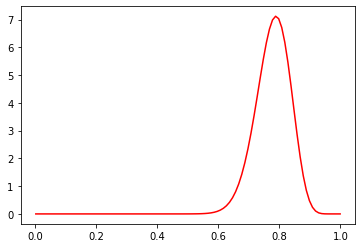

In [116]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy import integrate

fig, ax = plt.subplots(1, 1)

a = 42  
b = 12
x = np.linspace(0.001, .999, 100)
rv = beta(a,b)
ax.plot(x,beta.pdf(x,a,b),'r-')

mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
se_rv = np.sqrt(var)
print("standard error is",se_rv)
x2 = lambda x: x*beta.pdf(x,a,b)
print("The probability of next data point to be equal one is",integrate.quad(x2,0,1)[0])